Danny Ryan

Lab 14 

Tensorflow 

4/14/2020

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import networkx as nx
from operator import itemgetter
from sklearn.decomposition import PCA
import tensorflow as tf 
print(tf.__version__)

2.4.1


In [ ]:
mnist = tf.keras.datasets.mnist

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()
xtrain = xtrain / 255.0
xtest = xtest / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
ytest.shape

(10000,)

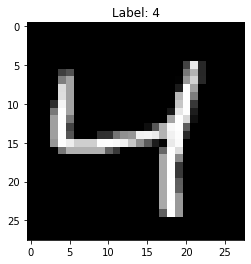

In [ ]:
train_idx = 2
plt.imshow(xtrain[train_idx], cmap = 'gray')
plt.title('Label: {}'.format(ytrain[train_idx]))
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Flatten(input_shape = (28,28)),
         tf.keras.layers.Dense(250, activation= 'relu'),
         tf.keras.layers.Dropout(0.2),
         tf.keras.layers.Dense(50)                           

])

In [ ]:
predictions = model(xtrain[:1]).numpy()
predictions

array([[ 0.0069414 , -0.21709405, -0.7069114 ,  0.14177501, -0.5611731 ,
         0.00917022,  0.00678533,  0.54468894, -0.03957268,  0.28116623,
         0.14095443,  0.7337955 ,  0.25904408, -0.34087363, -0.00890034,
        -0.5452677 ,  0.13524577,  0.17643225, -0.7900216 , -0.40734103,
        -0.49516922,  0.2253654 , -0.05643355,  0.27652952, -0.02820124,
         0.62443024,  0.33069575, -0.4144734 ,  0.3090097 ,  0.16385892,
        -0.2885621 , -0.3594337 ,  0.18570444, -0.10669024, -0.09076853,
         0.79945827, -0.41815656,  0.784816  , -0.44923598,  0.43080446,
         0.42568564,  0.43539342,  0.1086143 ,  0.2369851 , -0.6644778 ,
        -0.27896243, -0.48563007,  0.13588382,  0.40795743, -0.21247645]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.01851099, 0.01479559, 0.00906582, 0.02118298, 0.01048819,
        0.01855229, 0.0185081 , 0.03169351, 0.01766968, 0.0243514 ,
        0.02116561, 0.03829114, 0.0238186 , 0.013073  , 0.01822005,
        0.01065634, 0.02104512, 0.02192999, 0.00834282, 0.01223233,
        0.01120381, 0.02302979, 0.01737425, 0.02423875, 0.01787176,
        0.03432429, 0.02558788, 0.01214539, 0.02503895, 0.02165599,
        0.01377508, 0.01283261, 0.02213428, 0.01652266, 0.01678783,
        0.04088983, 0.01210074, 0.04029547, 0.01173044, 0.02828205,
        0.02813765, 0.02841214, 0.02049206, 0.02329895, 0.0094588 ,
        0.01390795, 0.0113112 , 0.02105855, 0.02764322, 0.01486406]],
      dtype=float32)

In [ ]:
 loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [ ]:
model.compile(optimizer='adam',
              loss = loss_fn,
              metrics = ['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, epochs = 35)

Epoch 1/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4849 - accuracy: 0.8676
Epoch 2/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1229 - accuracy: 0.9631
Epoch 3/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0895 - accuracy: 0.9725
Epoch 4/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0670 - accuracy: 0.9788
Epoch 5/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0530 - accuracy: 0.9835
Epoch 6/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0469 - accuracy: 0.9853
Epoch 7/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0395 - accuracy: 0.9880
Epoch 8/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0328 - accuracy: 0.9892
Epoch 9/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9905
Epoch 10/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.029

In [ ]:
model.evaluate(xtest, ytest, verbose = 2)

313/313 - 0s - loss: 0.1104 - accuracy: 0.9820


[0.11036433279514313, 0.9819999933242798]

In [ ]:
probability_model = tf.keras.Sequential([
        model,
        tf.keras.layers.Softmax()
])

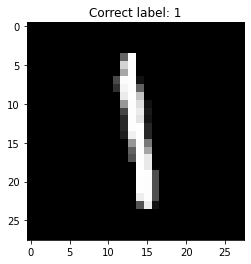

predicted probabilities:


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[9.1485081e-06, 9.8936939e-01, 2.3559731e-04, 3.7292519e-03,
        9.9402241e-05, 2.4495921e-03, 1.6660926e-04, 3.2280863e-04,
        3.5402237e-03, 7.8013007e-05]], dtype=float32)>

In [ ]:
test_idx = 145
plt.imshow(xtest[test_idx], cmap= plt.cm.gray)
plt.title('Correct label: {}'.format(ytest[test_idx]))
plt.show()
print("predicted probabilities:")
probability_model(xtest[test_idx:test_idx+1])

The accurecy on the training data was 0.9136 or 91.36%. The accurecy on the testing data was 0.9511 or 95.11%.

Overall, the best accurecy I could get (I stopped running tests on more layers and nuerons as my computer was not happy with me) was 98.20%. The conditions were 50 nuerons, 250 layers, and 35 epochs. Maybe more layers and nureons would have helped, but I do not think there is much room for improvement.

This model is overfitting, as the training accurecy is higher (but not by much) than the testing accurecy. As I added a large number of nuerons and layers, it does make sense the model is overfit. 